In [169]:
import pandas as pd

In [170]:
df = pd.read_csv('Interpolation/InterpolatedDenMonth.csv')

In [171]:
df

,DATES,D REVENUE,U CR,D OE,D NOI,U CAPEX,U CWK,D FCF
0,2009-12-31,1884.372544,976.202014,475.249997,757.519678,207.477947,3600.000000,856.600959
1,2010-01-31,1884.566826,983.762225,485.004015,734.017979,207.303532,3638.472896,810.859727
2,2010-02-28,1884.761107,991.322435,494.758033,710.516281,207.129117,3676.945791,765.118495
3,2010-03-31,1884.955389,998.882646,504.512051,687.014582,206.954702,3715.418687,719.377263
4,2010-04-30,1880.767673,1006.377690,481.542613,511.922217,207.283705,3792.839197,732.414605
...,...,...,...,...,...,...,...,...
104,2018-08-31,1785.193900,972.274049,461.469501,414.377788,98.125058,2795.231076,733.164793
105,2018-09-30,1730.706270,953.165883,488.056175,424.307526,95.323030,2858.452805,729.764211
106,2018-10-31,1667.921494,856.900384,471.261535,434.874583,92.144220,2849.606546,737.713784
107,2018-11-30,1605.136718,760.634885,454.466895,445.441639,88.965411,2840.760287,745.663358


In [172]:
df["D FCF"].mean()

721.8102386623852

In [173]:
dataset = df.values

In [174]:
dataset

array([['2009-12-31', 1884.372544, 976.2020142, 475.24999739999987,
        757.519678, 207.4779469, 3600.0, 856.6009594000002],
       ['2010-01-31', 1884.5668256666668, 983.7622247333335, 485.0040154,
        734.0179793333333, 207.30353190000002, 3638.472895666667,
        810.8597272333334],
       ['2010-02-28', 1884.761107333333, 991.3224352666666,
        494.75803339999993, 710.5162806666667, 207.12911689999999,
        3676.945791333333, 765.1184950666667],
       ['2010-03-31', 1884.955389, 998.8826458, 504.5120514, 687.014582,
        206.9547019, 3715.418687, 719.3772629],
       ['2010-04-30', 1880.767673333333, 1006.3776901999997,
        481.5426128333333, 511.92221730000006, 207.28370463333331,
        3792.8391966666654, 732.4146046],
       ['2010-05-31', 1876.5799576666668, 1013.8727346000001,
        458.5731742666666, 336.8298526000001, 207.61270736666665,
        3870.2597063333333, 745.4519462999999],
       ['2010-06-30', 1872.392242, 1021.367779, 435.6037357, 1

In [175]:
X = dataset[:,1:7]
Y = dataset[:,7]

In [176]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)


In [177]:
X_scale

array([[0.21536771, 0.34358992, 0.28760773, 1.        , 0.14011453,
        0.70628215],
       [0.21549004, 0.35192007, 0.32225043, 0.9605532 , 0.13991371,
        0.72165108],
       [0.21561238, 0.36025022, 0.35689312, 0.92110641, 0.13971289,
        0.73702   ],
       [0.21573472, 0.36858036, 0.39153581, 0.88165961, 0.13951207,
        0.75238893],
       [0.21309775, 0.37683871, 0.30995679, 0.58777307, 0.13989088,
        0.78331641],
       [0.21046078, 0.38509706, 0.22837778, 0.29388654, 0.14026969,
        0.8142439 ],
       [0.2078238 , 0.3933554 , 0.14679876, 0.        , 0.1406485 ,
        0.84517139],
       [0.19576386, 0.38652631, 0.09786584, 0.0434695 , 0.14038687,
        0.85238924],
       [0.18370391, 0.37969722, 0.04893292, 0.086939  , 0.14012524,
        0.85960709],
       [0.17164397, 0.37286814, 0.        , 0.1304085 , 0.13986361,
        0.86682494],
       [0.19455526, 0.37922834, 0.05993416, 0.14266337, 0.14557165,
        0.90348124],
       [0.21746656, 0

In [178]:
from sklearn.model_selection import train_test_split

In [179]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.2)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(87, 6) (11, 6) (11, 6) (87,) (11,) (11,)


In [180]:
from keras.models import Sequential
from keras.layers import Dense

In [181]:
model = Sequential([
    Dense(6, activation='elu', input_shape=(6,)),
    Dense(64, activation='elu'),
    Dense(64, activation='elu'),
    Dense(64, activation='elu'),
    Dense(64, activation='elu'),
    Dense(64, activation='elu'),
    Dense(64, activation='elu'),
    Dense(1, activation='elu'),
])

In [182]:
model.compile(optimizer='rmsprop',
              loss='mean_absolute_error')

In [183]:
hist = model.fit(X_train, Y_train,
          batch_size=2, epochs=1500,
          validation_data=(X_val, Y_val))

Train on 87 samples, validate on 11 samples
Epoch 1/1500
87/87 [==============================] - 0s 4ms/step - loss: 438.8143 - val_loss: 152.5198
Epoch 2/1500
87/87 [==============================] - 0s 1ms/step - loss: 101.0138 - val_loss: 150.4374
Epoch 3/1500
87/87 [==============================] - 0s 1ms/step - loss: 98.8184 - val_loss: 127.7902
Epoch 4/1500
87/87 [==============================] - 0s 1ms/step - loss: 86.6569 - val_loss: 114.6184
Epoch 5/1500
87/87 [==============================] - 0s 1ms/step - loss: 84.5963 - val_loss: 106.5863
Epoch 6/1500
87/87 [==============================] - 0s 1ms/step - loss: 78.1904 - val_loss: 101.3380
Epoch 7/1500
87/87 [==============================] - 0s 1ms/step - loss: 71.4647 - val_loss: 83.0783
Epoch 8/1500
87/87 [==============================] - 0s 1ms/step - loss: 67.7851 - val_loss: 84.7293
Epoch 9/1500
87/87 [==============================] - 0s 1ms/step - loss: 63.8796 - val_loss: 73.2591
Epoch 10/1500
87/87 [=========

87/87 [==============================] - 0s 1ms/step - loss: 34.9401 - val_loss: 37.6853
Epoch 81/1500
87/87 [==============================] - 0s 1ms/step - loss: 36.3083 - val_loss: 41.9930
Epoch 82/1500
87/87 [==============================] - 0s 1ms/step - loss: 32.7057 - val_loss: 55.5232
Epoch 83/1500
87/87 [==============================] - 0s 1ms/step - loss: 38.0848 - val_loss: 61.2371
Epoch 84/1500
87/87 [==============================] - 0s 988us/step - loss: 37.3506 - val_loss: 71.5020
Epoch 85/1500
87/87 [==============================] - 0s 1ms/step - loss: 34.2325 - val_loss: 36.8859
Epoch 86/1500
87/87 [==============================] - 0s 1ms/step - loss: 37.0285 - val_loss: 45.5795
Epoch 87/1500
87/87 [==============================] - 0s 1ms/step - loss: 35.4418 - val_loss: 24.9747
Epoch 88/1500
87/87 [==============================] - 0s 988us/step - loss: 34.3577 - val_loss: 27.2371
Epoch 89/1500
87/87 [==============================] - 0s 977us/step - loss: 36.058

87/87 [==============================] - 0s 1ms/step - loss: 32.3384 - val_loss: 32.5441
Epoch 159/1500
87/87 [==============================] - 0s 1ms/step - loss: 33.2654 - val_loss: 31.6608
Epoch 160/1500
87/87 [==============================] - 0s 1ms/step - loss: 32.2459 - val_loss: 22.6727
Epoch 161/1500
87/87 [==============================] - 0s 1000us/step - loss: 33.5846 - val_loss: 29.0701
Epoch 162/1500
87/87 [==============================] - 0s 1ms/step - loss: 31.8922 - val_loss: 44.5369
Epoch 163/1500
87/87 [==============================] - 0s 977us/step - loss: 32.8753 - val_loss: 30.7917
Epoch 164/1500
87/87 [==============================] - 0s 1ms/step - loss: 29.3144 - val_loss: 33.1994
Epoch 165/1500
87/87 [==============================] - 0s 1ms/step - loss: 30.3808 - val_loss: 26.3529
Epoch 166/1500
87/87 [==============================] - 0s 1ms/step - loss: 32.6956 - val_loss: 33.6596
Epoch 167/1500
87/87 [==============================] - 0s 1ms/step - loss

87/87 [==============================] - 0s 1ms/step - loss: 32.5188 - val_loss: 38.0566
Epoch 237/1500
87/87 [==============================] - 0s 1ms/step - loss: 27.7044 - val_loss: 36.1884
Epoch 238/1500
87/87 [==============================] - 0s 1ms/step - loss: 30.3321 - val_loss: 19.6533
Epoch 239/1500
87/87 [==============================] - 0s 965us/step - loss: 29.4382 - val_loss: 25.2752
Epoch 240/1500
87/87 [==============================] - 0s 1ms/step - loss: 26.6961 - val_loss: 25.9178
Epoch 241/1500
87/87 [==============================] - 0s 988us/step - loss: 28.1185 - val_loss: 34.4719
Epoch 242/1500
87/87 [==============================] - 0s 977us/step - loss: 29.0609 - val_loss: 25.4846
Epoch 243/1500
87/87 [==============================] - 0s 977us/step - loss: 30.1680 - val_loss: 27.5000
Epoch 244/1500
87/87 [==============================] - 0s 1ms/step - loss: 28.9397 - val_loss: 31.6818
Epoch 245/1500
87/87 [==============================] - 0s 1000us/step 

87/87 [==============================] - 0s 1ms/step - loss: 28.2976 - val_loss: 29.8579
Epoch 315/1500
87/87 [==============================] - 0s 1ms/step - loss: 27.0011 - val_loss: 27.4767
Epoch 316/1500
87/87 [==============================] - 0s 1ms/step - loss: 27.7230 - val_loss: 31.0718
Epoch 317/1500
87/87 [==============================] - 0s 1ms/step - loss: 27.3470 - val_loss: 40.5466
Epoch 318/1500
87/87 [==============================] - 0s 1ms/step - loss: 28.3813 - val_loss: 42.2218
Epoch 319/1500
87/87 [==============================] - 0s 1ms/step - loss: 27.8283 - val_loss: 22.1535
Epoch 320/1500
87/87 [==============================] - 0s 1ms/step - loss: 25.7832 - val_loss: 27.4760
Epoch 321/1500
87/87 [==============================] - 0s 1ms/step - loss: 27.3611 - val_loss: 41.4511
Epoch 322/1500
87/87 [==============================] - 0s 1ms/step - loss: 26.5135 - val_loss: 21.0505
Epoch 323/1500
87/87 [==============================] - 0s 1ms/step - loss: 27.

87/87 [==============================] - 0s 1ms/step - loss: 25.4398 - val_loss: 16.9864
Epoch 393/1500
87/87 [==============================] - 0s 1ms/step - loss: 25.5923 - val_loss: 27.5864
Epoch 394/1500
87/87 [==============================] - 0s 989us/step - loss: 24.9175 - val_loss: 34.7122
Epoch 395/1500
87/87 [==============================] - 0s 988us/step - loss: 25.3611 - val_loss: 22.0093
Epoch 396/1500
87/87 [==============================] - ETA: 0s - loss: 25.09 - 0s 1ms/step - loss: 23.7665 - val_loss: 29.9248
Epoch 397/1500
87/87 [==============================] - 0s 1000us/step - loss: 27.3015 - val_loss: 28.8628
Epoch 398/1500
87/87 [==============================] - 0s 1ms/step - loss: 24.7166 - val_loss: 13.4956
Epoch 399/1500
87/87 [==============================] - 0s 1ms/step - loss: 23.6255 - val_loss: 25.8087
Epoch 400/1500
87/87 [==============================] - 0s 1000us/step - loss: 24.1310 - val_loss: 20.6102
Epoch 401/1500
87/87 [=======================

87/87 [==============================] - 0s 1ms/step - loss: 23.9195 - val_loss: 22.3304
Epoch 471/1500
87/87 [==============================] - 0s 1ms/step - loss: 22.5311 - val_loss: 15.8339
Epoch 472/1500
87/87 [==============================] - 0s 1ms/step - loss: 20.3789 - val_loss: 16.0042
Epoch 473/1500
87/87 [==============================] - 0s 1ms/step - loss: 21.9696 - val_loss: 26.1621
Epoch 474/1500
87/87 [==============================] - 0s 977us/step - loss: 22.4270 - val_loss: 19.4265
Epoch 475/1500
87/87 [==============================] - 0s 1ms/step - loss: 21.0771 - val_loss: 19.4763
Epoch 476/1500
87/87 [==============================] - 0s 1ms/step - loss: 20.8193 - val_loss: 23.7767
Epoch 477/1500
87/87 [==============================] - 0s 1ms/step - loss: 21.6728 - val_loss: 34.8029
Epoch 478/1500
87/87 [==============================] - 0s 1ms/step - loss: 22.3676 - val_loss: 24.4849
Epoch 479/1500
87/87 [==============================] - 0s 1ms/step - loss: 2

87/87 [==============================] - 0s 1ms/step - loss: 19.3958 - val_loss: 20.0590
Epoch 549/1500
87/87 [==============================] - 0s 1ms/step - loss: 17.7396 - val_loss: 16.8724
Epoch 550/1500
87/87 [==============================] - 0s 1000us/step - loss: 17.2942 - val_loss: 19.3288
Epoch 551/1500
87/87 [==============================] - 0s 1ms/step - loss: 16.3484 - val_loss: 19.4965
Epoch 552/1500
87/87 [==============================] - 0s 1ms/step - loss: 18.2944 - val_loss: 15.9653
Epoch 553/1500
87/87 [==============================] - 0s 1ms/step - loss: 17.9834 - val_loss: 15.4580
Epoch 554/1500
87/87 [==============================] - 0s 1ms/step - loss: 17.7896 - val_loss: 18.8315
Epoch 555/1500
87/87 [==============================] - 0s 1ms/step - loss: 17.3283 - val_loss: 30.5337
Epoch 556/1500
87/87 [==============================] - 0s 1ms/step - loss: 17.4743 - val_loss: 23.9386
Epoch 557/1500
87/87 [==============================] - 0s 1ms/step - loss: 

87/87 [==============================] - 0s 1ms/step - loss: 16.4668 - val_loss: 33.0723
Epoch 627/1500
87/87 [==============================] - 0s 1ms/step - loss: 16.4045 - val_loss: 15.4372
Epoch 628/1500
87/87 [==============================] - 0s 1ms/step - loss: 15.6774 - val_loss: 31.1314
Epoch 629/1500
87/87 [==============================] - 0s 1ms/step - loss: 15.8105 - val_loss: 17.9733
Epoch 630/1500
87/87 [==============================] - 0s 1ms/step - loss: 15.8659 - val_loss: 14.8996
Epoch 631/1500
87/87 [==============================] - 0s 1ms/step - loss: 16.2924 - val_loss: 13.6544
Epoch 632/1500
87/87 [==============================] - 0s 1000us/step - loss: 16.0012 - val_loss: 16.9915
Epoch 633/1500
87/87 [==============================] - 0s 1ms/step - loss: 15.4097 - val_loss: 15.6238
Epoch 634/1500
87/87 [==============================] - 0s 1ms/step - loss: 16.2170 - val_loss: 22.2047
Epoch 635/1500
87/87 [==============================] - 0s 1ms/step - loss: 

87/87 [==============================] - 0s 1ms/step - loss: 15.1841 - val_loss: 16.1337
Epoch 705/1500
87/87 [==============================] - 0s 1ms/step - loss: 13.6047 - val_loss: 24.2869
Epoch 706/1500
87/87 [==============================] - 0s 1000us/step - loss: 13.2179 - val_loss: 14.9026
Epoch 707/1500
87/87 [==============================] - 0s 1ms/step - loss: 14.0374 - val_loss: 20.5185
Epoch 708/1500
87/87 [==============================] - 0s 1ms/step - loss: 14.6738 - val_loss: 28.7923
Epoch 709/1500
87/87 [==============================] - 0s 1ms/step - loss: 14.9447 - val_loss: 22.4185
Epoch 710/1500
87/87 [==============================] - 0s 1ms/step - loss: 14.3164 - val_loss: 20.7438
Epoch 711/1500
87/87 [==============================] - 0s 1000us/step - loss: 14.1710 - val_loss: 16.9221
Epoch 712/1500
87/87 [==============================] - 0s 989us/step - loss: 13.3124 - val_loss: 24.0562
Epoch 713/1500
87/87 [==============================] - 0s 1ms/step - l

87/87 [==============================] - 0s 1ms/step - loss: 14.5377 - val_loss: 20.4421
Epoch 783/1500
87/87 [==============================] - 0s 1ms/step - loss: 13.6280 - val_loss: 14.0653
Epoch 784/1500
87/87 [==============================] - 0s 988us/step - loss: 14.1802 - val_loss: 16.9685
Epoch 785/1500
87/87 [==============================] - 0s 1ms/step - loss: 14.1933 - val_loss: 18.9457
Epoch 786/1500
87/87 [==============================] - 0s 1ms/step - loss: 13.7880 - val_loss: 14.8039
Epoch 787/1500
87/87 [==============================] - 0s 988us/step - loss: 14.1710 - val_loss: 24.0768
Epoch 788/1500
87/87 [==============================] - 0s 1ms/step - loss: 14.2067 - val_loss: 19.2065
Epoch 789/1500
87/87 [==============================] - 0s 1ms/step - loss: 13.9647 - val_loss: 14.8160
Epoch 790/1500
87/87 [==============================] - 0s 1ms/step - loss: 14.3434 - val_loss: 11.4256
Epoch 791/1500
87/87 [==============================] - 0s 1ms/step - loss:

87/87 [==============================] - 0s 1ms/step - loss: 12.1039 - val_loss: 18.1357
Epoch 861/1500
87/87 [==============================] - 0s 1000us/step - loss: 13.4408 - val_loss: 19.8856
Epoch 862/1500
87/87 [==============================] - 0s 1ms/step - loss: 13.8773 - val_loss: 15.5804
Epoch 863/1500
87/87 [==============================] - 0s 1ms/step - loss: 11.8996 - val_loss: 25.7536
Epoch 864/1500
87/87 [==============================] - 0s 988us/step - loss: 14.3928 - val_loss: 13.0095
Epoch 865/1500
87/87 [==============================] - 0s 977us/step - loss: 12.2295 - val_loss: 18.3187
Epoch 866/1500
87/87 [==============================] - 0s 1ms/step - loss: 12.2453 - val_loss: 17.8368
Epoch 867/1500
87/87 [==============================] - 0s 1000us/step - loss: 13.5276 - val_loss: 12.8649
Epoch 868/1500
87/87 [==============================] - 0s 1000us/step - loss: 11.7911 - val_loss: 23.0621
Epoch 869/1500
87/87 [==============================] - 0s 1ms/ste

87/87 [==============================] - 0s 1ms/step - loss: 12.3377 - val_loss: 25.7963
Epoch 939/1500
87/87 [==============================] - 0s 989us/step - loss: 11.7233 - val_loss: 19.6986
Epoch 940/1500
87/87 [==============================] - 0s 1ms/step - loss: 11.4336 - val_loss: 11.3068
Epoch 941/1500
87/87 [==============================] - 0s 1ms/step - loss: 11.3701 - val_loss: 17.2027
Epoch 942/1500
87/87 [==============================] - 0s 1ms/step - loss: 11.3007 - val_loss: 18.7330
Epoch 943/1500
87/87 [==============================] - 0s 1000us/step - loss: 12.2328 - val_loss: 10.7544
Epoch 944/1500
87/87 [==============================] - 0s 1ms/step - loss: 12.5143 - val_loss: 12.6509
Epoch 945/1500
87/87 [==============================] - 0s 1ms/step - loss: 12.2136 - val_loss: 18.5257
Epoch 946/1500
87/87 [==============================] - 0s 1ms/step - loss: 10.9230 - val_loss: 12.5675
Epoch 947/1500
87/87 [==============================] - 0s 1000us/step - l

87/87 [==============================] - 0s 1ms/step - loss: 10.8076 - val_loss: 16.2482
Epoch 1017/1500
87/87 [==============================] - 0s 1ms/step - loss: 11.9700 - val_loss: 15.2812
Epoch 1018/1500
87/87 [==============================] - 0s 1ms/step - loss: 10.3511 - val_loss: 18.3440
Epoch 1019/1500
87/87 [==============================] - 0s 1ms/step - loss: 10.8693 - val_loss: 23.6562
Epoch 1020/1500
87/87 [==============================] - 0s 989us/step - loss: 10.5270 - val_loss: 16.3734
Epoch 1021/1500
87/87 [==============================] - 0s 988us/step - loss: 12.3430 - val_loss: 12.2849
Epoch 1022/1500
87/87 [==============================] - 0s 1ms/step - loss: 10.7300 - val_loss: 14.9537
Epoch 1023/1500
87/87 [==============================] - 0s 1ms/step - loss: 11.5479 - val_loss: 7.7907
Epoch 1024/1500
87/87 [==============================] - 0s 1ms/step - loss: 10.7427 - val_loss: 13.0013
Epoch 1025/1500
87/87 [==============================] - 0s 1ms/step

87/87 [==============================] - 0s 1ms/step - loss: 10.9009 - val_loss: 8.4108
Epoch 1095/1500
87/87 [==============================] - 0s 988us/step - loss: 10.1645 - val_loss: 12.3342
Epoch 1096/1500
87/87 [==============================] - 0s 1ms/step - loss: 9.9418 - val_loss: 15.7947
Epoch 1097/1500
87/87 [==============================] - 0s 966us/step - loss: 10.2141 - val_loss: 24.3359
Epoch 1098/1500
87/87 [==============================] - 0s 1000us/step - loss: 10.5015 - val_loss: 14.8130
Epoch 1099/1500
87/87 [==============================] - 0s 1ms/step - loss: 10.9901 - val_loss: 17.5101
Epoch 1100/1500
87/87 [==============================] - 0s 988us/step - loss: 10.0115 - val_loss: 22.1283
Epoch 1101/1500
87/87 [==============================] - 0s 988us/step - loss: 10.2036 - val_loss: 16.9304
Epoch 1102/1500
87/87 [==============================] - 0s 1ms/step - loss: 10.2176 - val_loss: 8.5229
Epoch 1103/1500
87/87 [==============================] - 0s 1ms

Epoch 1172/1500
87/87 [==============================] - 0s 1ms/step - loss: 9.9272 - val_loss: 13.8019
Epoch 1173/1500
87/87 [==============================] - 0s 1ms/step - loss: 9.6765 - val_loss: 14.3396
Epoch 1174/1500
87/87 [==============================] - 0s 1ms/step - loss: 9.0707 - val_loss: 13.9661
Epoch 1175/1500
87/87 [==============================] - 0s 1ms/step - loss: 10.4115 - val_loss: 11.6941
Epoch 1176/1500
87/87 [==============================] - 0s 1ms/step - loss: 9.2659 - val_loss: 21.0368
Epoch 1177/1500
87/87 [==============================] - 0s 1ms/step - loss: 9.5152 - val_loss: 21.5045
Epoch 1178/1500
87/87 [==============================] - 0s 1ms/step - loss: 10.2393 - val_loss: 14.2482
Epoch 1179/1500
87/87 [==============================] - 0s 1ms/step - loss: 10.2869 - val_loss: 18.4201
Epoch 1180/1500
87/87 [==============================] - 0s 1ms/step - loss: 10.0606 - val_loss: 24.3850
Epoch 1181/1500
87/87 [==============================] - 0s 

87/87 [==============================] - 0s 1ms/step - loss: 9.5025 - val_loss: 15.7854
Epoch 1251/1500
87/87 [==============================] - 0s 1ms/step - loss: 9.0259 - val_loss: 19.4624
Epoch 1252/1500
87/87 [==============================] - 0s 977us/step - loss: 9.8557 - val_loss: 10.5304
Epoch 1253/1500
87/87 [==============================] - 0s 1ms/step - loss: 9.7063 - val_loss: 21.2774
Epoch 1254/1500
87/87 [==============================] - 0s 1ms/step - loss: 9.0622 - val_loss: 14.0326
Epoch 1255/1500
87/87 [==============================] - 0s 1ms/step - loss: 9.3011 - val_loss: 9.9568
Epoch 1256/1500
87/87 [==============================] - 0s 1ms/step - loss: 9.1450 - val_loss: 10.9822
Epoch 1257/1500
87/87 [==============================] - 0s 1ms/step - loss: 9.5270 - val_loss: 10.7068
Epoch 1258/1500
87/87 [==============================] - 0s 989us/step - loss: 9.8694 - val_loss: 10.2048
Epoch 1259/1500
87/87 [==============================] - 0s 1ms/step - loss: 

87/87 [==============================] - 0s 1ms/step - loss: 9.2418 - val_loss: 14.4213
Epoch 1329/1500
87/87 [==============================] - 0s 1ms/step - loss: 9.1625 - val_loss: 10.1879
Epoch 1330/1500
87/87 [==============================] - 0s 1ms/step - loss: 8.7101 - val_loss: 8.4224
Epoch 1331/1500
87/87 [==============================] - 0s 1ms/step - loss: 8.6268 - val_loss: 12.6371
Epoch 1332/1500
87/87 [==============================] - 0s 1ms/step - loss: 9.4272 - val_loss: 22.3458
Epoch 1333/1500
87/87 [==============================] - 0s 1ms/step - loss: 9.3767 - val_loss: 12.7197
Epoch 1334/1500
87/87 [==============================] - 0s 1ms/step - loss: 9.1660 - val_loss: 7.3529
Epoch 1335/1500
87/87 [==============================] - 0s 1ms/step - loss: 9.0790 - val_loss: 15.5981
Epoch 1336/1500
87/87 [==============================] - 0s 1ms/step - loss: 9.2485 - val_loss: 13.0247
Epoch 1337/1500
87/87 [==============================] - 0s 1ms/step - loss: 9.186

87/87 [==============================] - 0s 1ms/step - loss: 8.9219 - val_loss: 19.0499
Epoch 1407/1500
87/87 [==============================] - 0s 1ms/step - loss: 8.4257 - val_loss: 14.4159
Epoch 1408/1500
87/87 [==============================] - 0s 1ms/step - loss: 9.6513 - val_loss: 11.5762
Epoch 1409/1500
87/87 [==============================] - 0s 1ms/step - loss: 8.2817 - val_loss: 13.8373
Epoch 1410/1500
87/87 [==============================] - 0s 1ms/step - loss: 8.8249 - val_loss: 10.3057
Epoch 1411/1500
87/87 [==============================] - 0s 1ms/step - loss: 8.2457 - val_loss: 12.9646
Epoch 1412/1500
87/87 [==============================] - 0s 1ms/step - loss: 9.4317 - val_loss: 12.3821
Epoch 1413/1500
87/87 [==============================] - 0s 1ms/step - loss: 8.9389 - val_loss: 15.5802
Epoch 1414/1500
87/87 [==============================] - 0s 1ms/step - loss: 9.5532 - val_loss: 11.3063
Epoch 1415/1500
87/87 [==============================] - 0s 1ms/step - loss: 8.4

Epoch 1485/1500
87/87 [==============================] - 0s 1ms/step - loss: 8.6500 - val_loss: 9.7366
Epoch 1486/1500
87/87 [==============================] - 0s 1ms/step - loss: 8.2638 - val_loss: 9.6539
Epoch 1487/1500
87/87 [==============================] - 0s 1000us/step - loss: 7.4797 - val_loss: 20.4515
Epoch 1488/1500
87/87 [==============================] - 0s 1ms/step - loss: 9.0083 - val_loss: 23.5118
Epoch 1489/1500
87/87 [==============================] - 0s 1ms/step - loss: 8.7650 - val_loss: 11.0666
Epoch 1490/1500
87/87 [==============================] - 0s 1ms/step - loss: 9.3244 - val_loss: 15.5655
Epoch 1491/1500
87/87 [==============================] - 0s 1ms/step - loss: 8.4516 - val_loss: 8.0124
Epoch 1492/1500
87/87 [==============================] - 0s 1ms/step - loss: 8.3678 - val_loss: 11.0296
Epoch 1493/1500
87/87 [==============================] - 0s 1ms/step - loss: 9.0761 - val_loss: 14.7269
Epoch 1494/1500
87/87 [==============================] - 0s 1ms/

In [184]:
import matplotlib.pyplot as plt

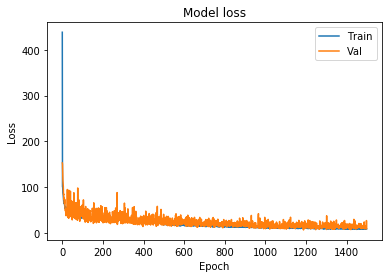

In [185]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [186]:
# serialize model to JSON
model_json = model.to_json()
with open("modelden.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("modelden.h5")
print("Saved model to disk")

Saved model to disk


In [187]:
import numpy as np
from numpy import array
arr = []
for x in range(len(X_scale)):
    Xnew = array([[X_scale[x][0], X_scale[x][1] , X_scale[x][2], X_scale[x][3], X_scale[x][4], X_scale[x][5]]])
    ynew = model.predict(Xnew)
    #print(ynew[0][0])
    arr.append(ynew[0][0])
array = np.array(arr)

In [188]:
from sklearn.metrics import r2_score
r2_score(Y.tolist(), array.tolist())

0.9760889628573626